In [4]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [5]:
# Importing the datasets

train = pd.read_csv("train.csv")

target = pd.read_csv("train_labels.csv")

train_lag = pd.read_csv("target_pairs.csv")

In [6]:
target.head()

,date_id,target_0,target_1,target_2,target_3,target_4,target_5,target_6,target_7,target_8,...,target_414,target_415,target_416,target_417,target_418,target_419,target_420,target_421,target_422,target_423
0,0,0.005948,-0.002851,-0.004675,-0.000639,NaN,NaN,-0.006729,0.006066,NaN,...,NaN,0.021239,-0.005595,NaN,-0.004628,0.033793,NaN,0.038234,NaN,0.027310
1,1,0.005783,-0.024118,-0.007052,-0.018955,-0.031852,-0.019452,0.003002,-0.006876,-0.002042,...,0.003377,0.021372,-0.001517,0.012846,0.010547,0.030527,-0.000764,0.025021,0.003548,0.020940
2,2,0.001048,0.023836,-0.008934,-0.022060,NaN,NaN,0.037449,0.007658,NaN,...,-0.006712,0.009308,0.001857,-0.012761,-0.002345,0.017529,-0.005394,0.004835,-0.009075,0.001706
3,3,0.001700,-0.024618,0.011943,0.004778,NaN,NaN,-0.012519,-0.016896,NaN,...,NaN,0.036880,-0.015189,NaN,0.008118,0.001079,NaN,-0.015102,NaN,-0.033010
4,4,-0.003272,0.005234,0.006856,0.013312,0.023953,0.010681,-0.011649,0.002019,0.003897,...,NaN,0.004937,NaN,-0.006673,-0.016105,-0.004885,NaN,NaN,0.009514,NaN


In [7]:
print("Target columns:")
print(target.columns.tolist())
print("\nNumber of columns:", len(target.columns))
print("\nFirst few rows of target:")
print(target.head())

Target columns:
['date_id', 'target_0', 'target_1', 'target_2', 'target_3', 'target_4', 'target_5', 'target_6', 'target_7', 'target_8', 'target_9', 'target_10', 'target_11', 'target_12', 'target_13', 'target_14', 'target_15', 'target_16', 'target_17', 'target_18', 'target_19', 'target_20', 'target_21', 'target_22', 'target_23', 'target_24', 'target_25', 'target_26', 'target_27', 'target_28', 'target_29', 'target_30', 'target_31', 'target_32', 'target_33', 'target_34', 'target_35', 'target_36', 'target_37', 'target_38', 'target_39', 'target_40', 'target_41', 'target_42', 'target_43', 'target_44', 'target_45', 'target_46', 'target_47', 'target_48', 'target_49', 'target_50', 'target_51', 'target_52', 'target_53', 'target_54', 'target_55', 'target_56', 'target_57', 'target_58', 'target_59', 'target_60', 'target_61', 'target_62', 'target_63', 'target_64', 'target_65', 'target_66', 'target_67', 'target_68', 'target_69', 'target_70', 'target_71', 'target_72', 'target_73', 'target_74', 'target

In [8]:
# Get all target columns (excluding date_id)
target_columns = [col for col in target.columns if col != 'date_id']

# Verify we got the right columns
print("Target columns to melt:", len(target_columns))

# Perform the melt operation
target_long = pd.melt(
    target,
    id_vars=['date_id'],
    value_vars=target_columns,
    var_name='target_name',
    value_name='target_value'
)

# Verify the result
print("\nUnique target names:", target_long['target_name'].unique())
print("\nShape of melted data:", target_long.shape)
print("\nFirst few rows:")
print(target_long.head(10))

Target columns to melt: 424

Unique target names: ['target_0' 'target_1' 'target_2' 'target_3' 'target_4' 'target_5'
 'target_6' 'target_7' 'target_8' 'target_9' 'target_10' 'target_11'
 'target_12' 'target_13' 'target_14' 'target_15' 'target_16' 'target_17'
 'target_18' 'target_19' 'target_20' 'target_21' 'target_22' 'target_23'
 'target_24' 'target_25' 'target_26' 'target_27' 'target_28' 'target_29'
 'target_30' 'target_31' 'target_32' 'target_33' 'target_34' 'target_35'
 'target_36' 'target_37' 'target_38' 'target_39' 'target_40' 'target_41'
 'target_42' 'target_43' 'target_44' 'target_45' 'target_46' 'target_47'
 'target_48' 'target_49' 'target_50' 'target_51' 'target_52' 'target_53'
 'target_54' 'target_55' 'target_56' 'target_57' 'target_58' 'target_59'
 'target_60' 'target_61' 'target_62' 'target_63' 'target_64' 'target_65'
 'target_66' 'target_67' 'target_68' 'target_69' 'target_70' 'target_71'
 'target_72' 'target_73' 'target_74' 'target_75' 'target_76' 'target_77'
 'target_78

In [9]:
# Check unique values in target_name column
print("Unique target names:")
print(target_long['target_name'].unique())

# Get count of each target_name
print("\nCount of each target name:")
print(target_long['target_name'].value_counts())

Unique target names:
['target_0' 'target_1' 'target_2' 'target_3' 'target_4' 'target_5'
 'target_6' 'target_7' 'target_8' 'target_9' 'target_10' 'target_11'
 'target_12' 'target_13' 'target_14' 'target_15' 'target_16' 'target_17'
 'target_18' 'target_19' 'target_20' 'target_21' 'target_22' 'target_23'
 'target_24' 'target_25' 'target_26' 'target_27' 'target_28' 'target_29'
 'target_30' 'target_31' 'target_32' 'target_33' 'target_34' 'target_35'
 'target_36' 'target_37' 'target_38' 'target_39' 'target_40' 'target_41'
 'target_42' 'target_43' 'target_44' 'target_45' 'target_46' 'target_47'
 'target_48' 'target_49' 'target_50' 'target_51' 'target_52' 'target_53'
 'target_54' 'target_55' 'target_56' 'target_57' 'target_58' 'target_59'
 'target_60' 'target_61' 'target_62' 'target_63' 'target_64' 'target_65'
 'target_66' 'target_67' 'target_68' 'target_69' 'target_70' 'target_71'
 'target_72' 'target_73' 'target_74' 'target_75' 'target_76' 'target_77'
 'target_78' 'target_79' 'target_80' 'ta

In [10]:
# Merging the lag data with the target_pair

train_lag = train_lag.rename(columns={"target": "target_name"})

target_long = target_long.merge(train_lag, on="target_name",how= "left")

print(target_long.head())

   date_id target_name  target_value  lag                   pair
0        0    target_0      0.005948    1  US_Stock_VT_adj_close
1        1    target_0      0.005783    1  US_Stock_VT_adj_close
2        2    target_0      0.001048    1  US_Stock_VT_adj_close
3        3    target_0      0.001700    1  US_Stock_VT_adj_close
4        4    target_0     -0.003272    1  US_Stock_VT_adj_close


In [11]:
# To merge it finally with the train dateset

target_long = target_long.merge(train, on="date_id", how="left")
print(target_long.head())

   date_id target_name  target_value  lag                   pair  \
0        0    target_0      0.005948    1  US_Stock_VT_adj_close   
1        1    target_0      0.005783    1  US_Stock_VT_adj_close   
2        2    target_0      0.001048    1  US_Stock_VT_adj_close   
3        3    target_0      0.001700    1  US_Stock_VT_adj_close   
4        4    target_0     -0.003272    1  US_Stock_VT_adj_close   

   LME_AH_Close  LME_CA_Close  LME_PB_Close  LME_ZS_Close  \
0        2264.5        7205.0        2570.0        3349.0   
1        2228.0        7147.0        2579.0        3327.0   
2        2250.0        7188.5        2587.0        3362.0   
3        2202.5        7121.0        2540.0        3354.0   
4        2175.0        7125.0        2604.0        3386.0   

   JPX_Gold_Mini_Futures_Open  ...  FX_GBPCAD  FX_CADCHF  FX_NZDCAD  \
0                         NaN  ...   1.699987   0.776874   0.888115   
1                         NaN  ...   1.695279   0.778682   0.889488   
2          

In [12]:
target_long.shape

(812808, 562)

In [13]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
import pandas as pd

def feature_importance_experiment(data, lag_value):
    # Filter the data for the specific lag
    lag_data = data[data['lag'] == lag_value]
    
    # Prepare features (X) and target (y)
    feature_cols = [col for col in lag_data.columns if col not in ['date_id', 'target_name', 'target_value', 'lag', 'pair']]
    X = lag_data[feature_cols]
    y = lag_data['target_value']

    # Drop rows where y (target) is NaN
    X = X[y.notna()]
    y = y.dropna()
    
    # Drop rows with missing values
    X = X.dropna()
    y = y.loc[X.index]
    
    # Split the data into training and validation sets
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)
    
    # Train a Random Forest model
    rf = RandomForestRegressor(n_estimators=100, random_state=42, n_jobs=-1)
    rf.fit(X_train, y_train)
    
    # Get feature importances
    importances = pd.Series(rf.feature_importances_, index=feature_cols).sort_values(ascending=False)
    
    # Print the top 10 features
    print(f"Top 10 features for lag={lag_value}:")
    print(importances.head(10))
    print("\n")
    
    return importances

# Run the experiments for each lag
for lag in [1, 2, 3, 4]:
    feature_importance_experiment(target_long, lag)

Top 10 features for lag=1:
JPX_RSS3_Rubber_Futures_Volume    0.017716
US_Stock_MPC_adj_volume           0.016504
US_Stock_KMI_adj_volume           0.015020
US_Stock_NUE_adj_volume           0.014339
US_Stock_URA_adj_volume           0.012172
US_Stock_RIO_adj_volume           0.009540
US_Stock_VCSH_adj_volume          0.008676
US_Stock_VGLT_adj_volume          0.008263
US_Stock_TIP_adj_volume           0.008196
US_Stock_VT_adj_volume            0.008118
dtype: float64


Top 10 features for lag=2:
US_Stock_WMB_adj_volume     0.013113
US_Stock_BNDX_adj_volume    0.010984
US_Stock_EMB_adj_volume     0.010672
US_Stock_VALE_adj_volume    0.010188
US_Stock_MPC_adj_volume     0.010017
US_Stock_VGIT_adj_volume    0.008807
US_Stock_FNV_adj_volume     0.008756
US_Stock_OXY_adj_volume     0.008667
US_Stock_DE_adj_volume      0.008652
US_Stock_TECK_adj_volume    0.008327
dtype: float64


Top 10 features for lag=3:
US_Stock_AG_adj_low                            0.025161
LME_AH_Close                 

In [14]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


# Define the top feature we identified for each lag from our previous analysis
top_features_by_lag = {
    1: 'JPX_RSS3_Rubber_Futures_Volume',
    2: 'US_Stock_WMB_adj_volume',
    3: 'US_Stock_AG_adj_low',
    4: 'FX_AUDNZD'
}

# We will create a 4x3 grid: 4 rows (one for each lag) and 3 columns (Time Series, ACF, PACF)
fig, axes = plt.subplots(4, 3, figsize=(20, 18))
plt.suptitle('Comparative Analysis of Top Features by Lag', fontsize=20, y=1.03)

# Loop Through Each Lag and Plot ---
for i, (lag, feature_name) in enumerate(top_features_by_lag.items()):
    print(f"Processing Lag {lag}: {feature_name}...")
    
    # Prepare the data series for the current feature, dropping any missing values
    if feature_name in target_long.columns:
        series = target_long[feature_name].dropna()
    else:
        print(f"Feature {feature_name} not found, skipping...")
        continue

    # --- Column 1: Time Series Plot ---
    # Use seaborn for a clean line plot
    sns.lineplot(x=target_long.index, y=target_long[feature_name], ax=axes[i, 0], lw=1)
    # Set a title for the row on the y-axis
    axes[i, 0].set_ylabel(f"Lag {lag}\n{feature_name}", fontsize=12, rotation=0, labelpad=80, ha='right')
    axes[i, 0].tick_params(axis='x', rotation=45)


    # --- Column 2: ACF Plot ---
    # Use the plotting function from statsmodels
    plot_acf(series, ax=axes[i, 1], lags=40, title="Autocorrelation (ACF)")

    # --- Column 3: PACF Plot ---
    # Use the plotting function from statsmodels
    plot_pacf(series, ax=axes[i, 2], lags=40, title="Partial Autocorrelation (PACF)")

# Set main titles for the columns on the first row to avoid repetition
axes[0, 0].set_title("Time Series Behavior", fontsize=14)
axes[0, 1].set_title("Autocorrelation (ACF)", fontsize=14)
axes[0, 2].set_title("Partial Autocorrelation (PACF)", fontsize=14)


# Adjust layout to prevent titles from overlapping and save the figure
plt.tight_layout(rect=[0, 0, 1, 0.98]) 
plt.savefig('comparative_feature_analysis.png', dpi=120)

print("\nScript finished. 'comparative_feature_analysis.png' has been saved.")


Processing Lag 1: JPX_RSS3_Rubber_Futures_Volume...
Processing Lag 2: US_Stock_WMB_adj_volume...
Processing Lag 3: US_Stock_AG_adj_low...
Processing Lag 4: FX_AUDNZD...

Script finished. 'comparative_feature_analysis.png' has been saved.


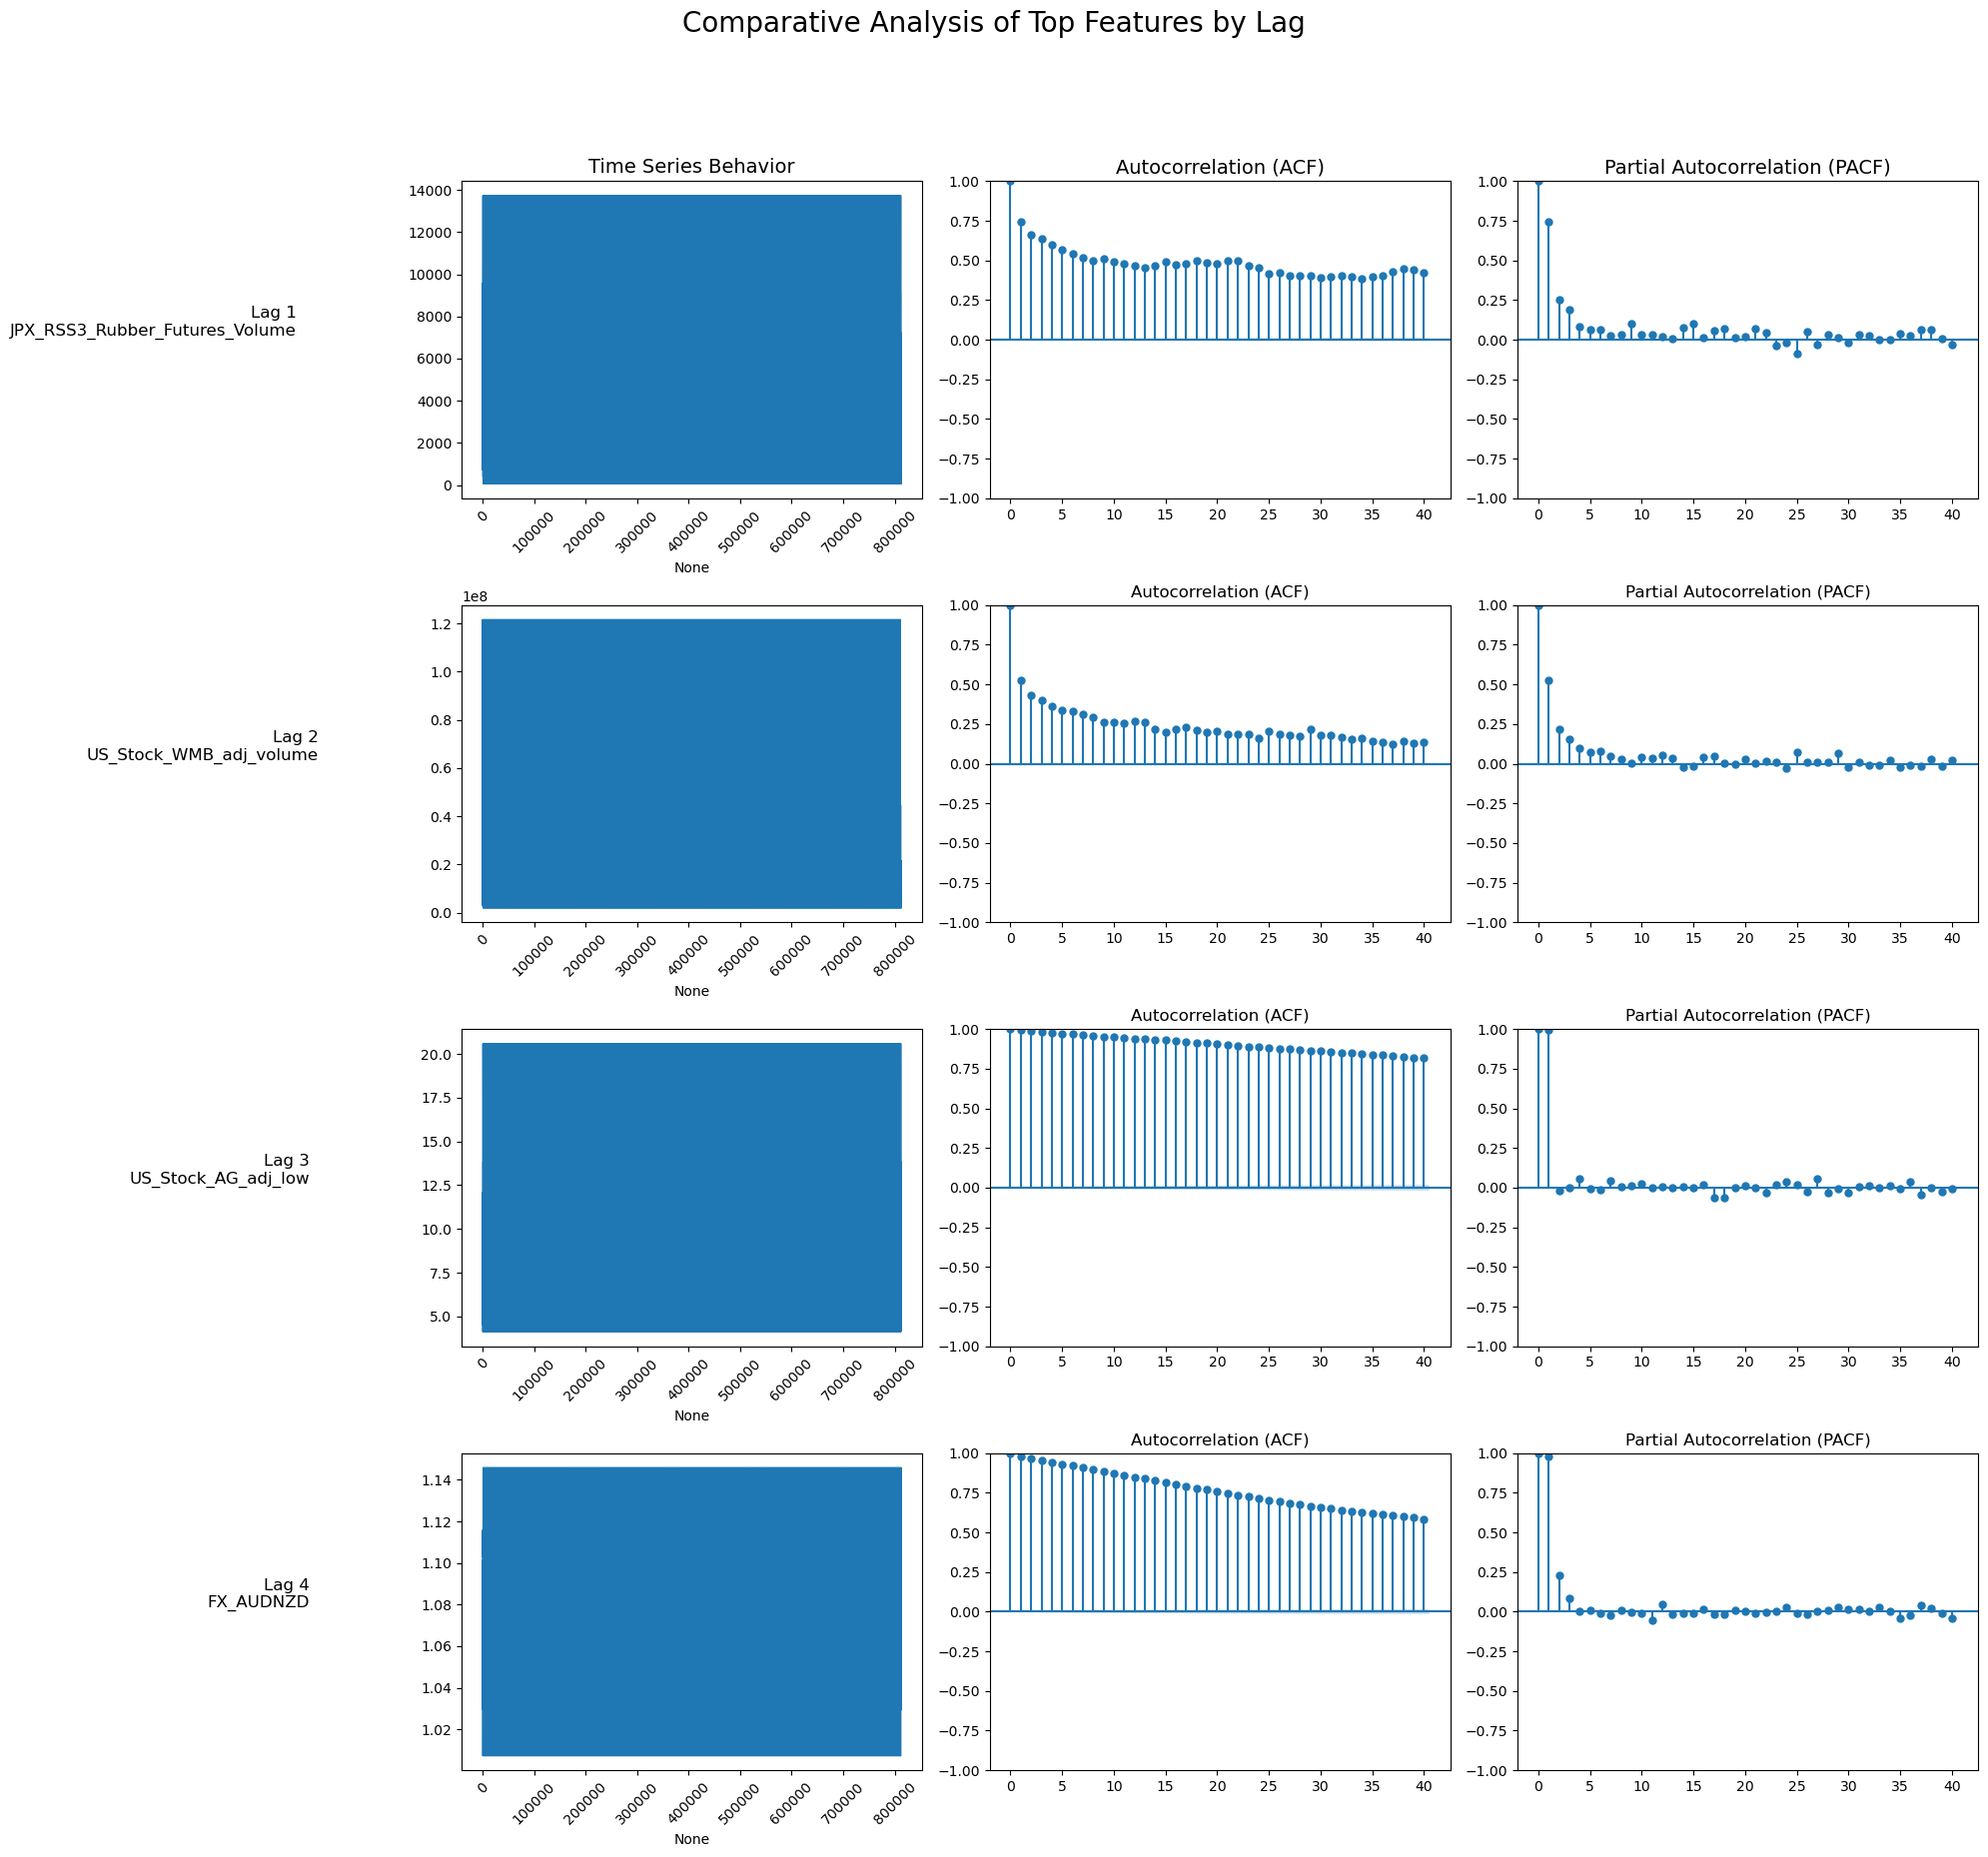

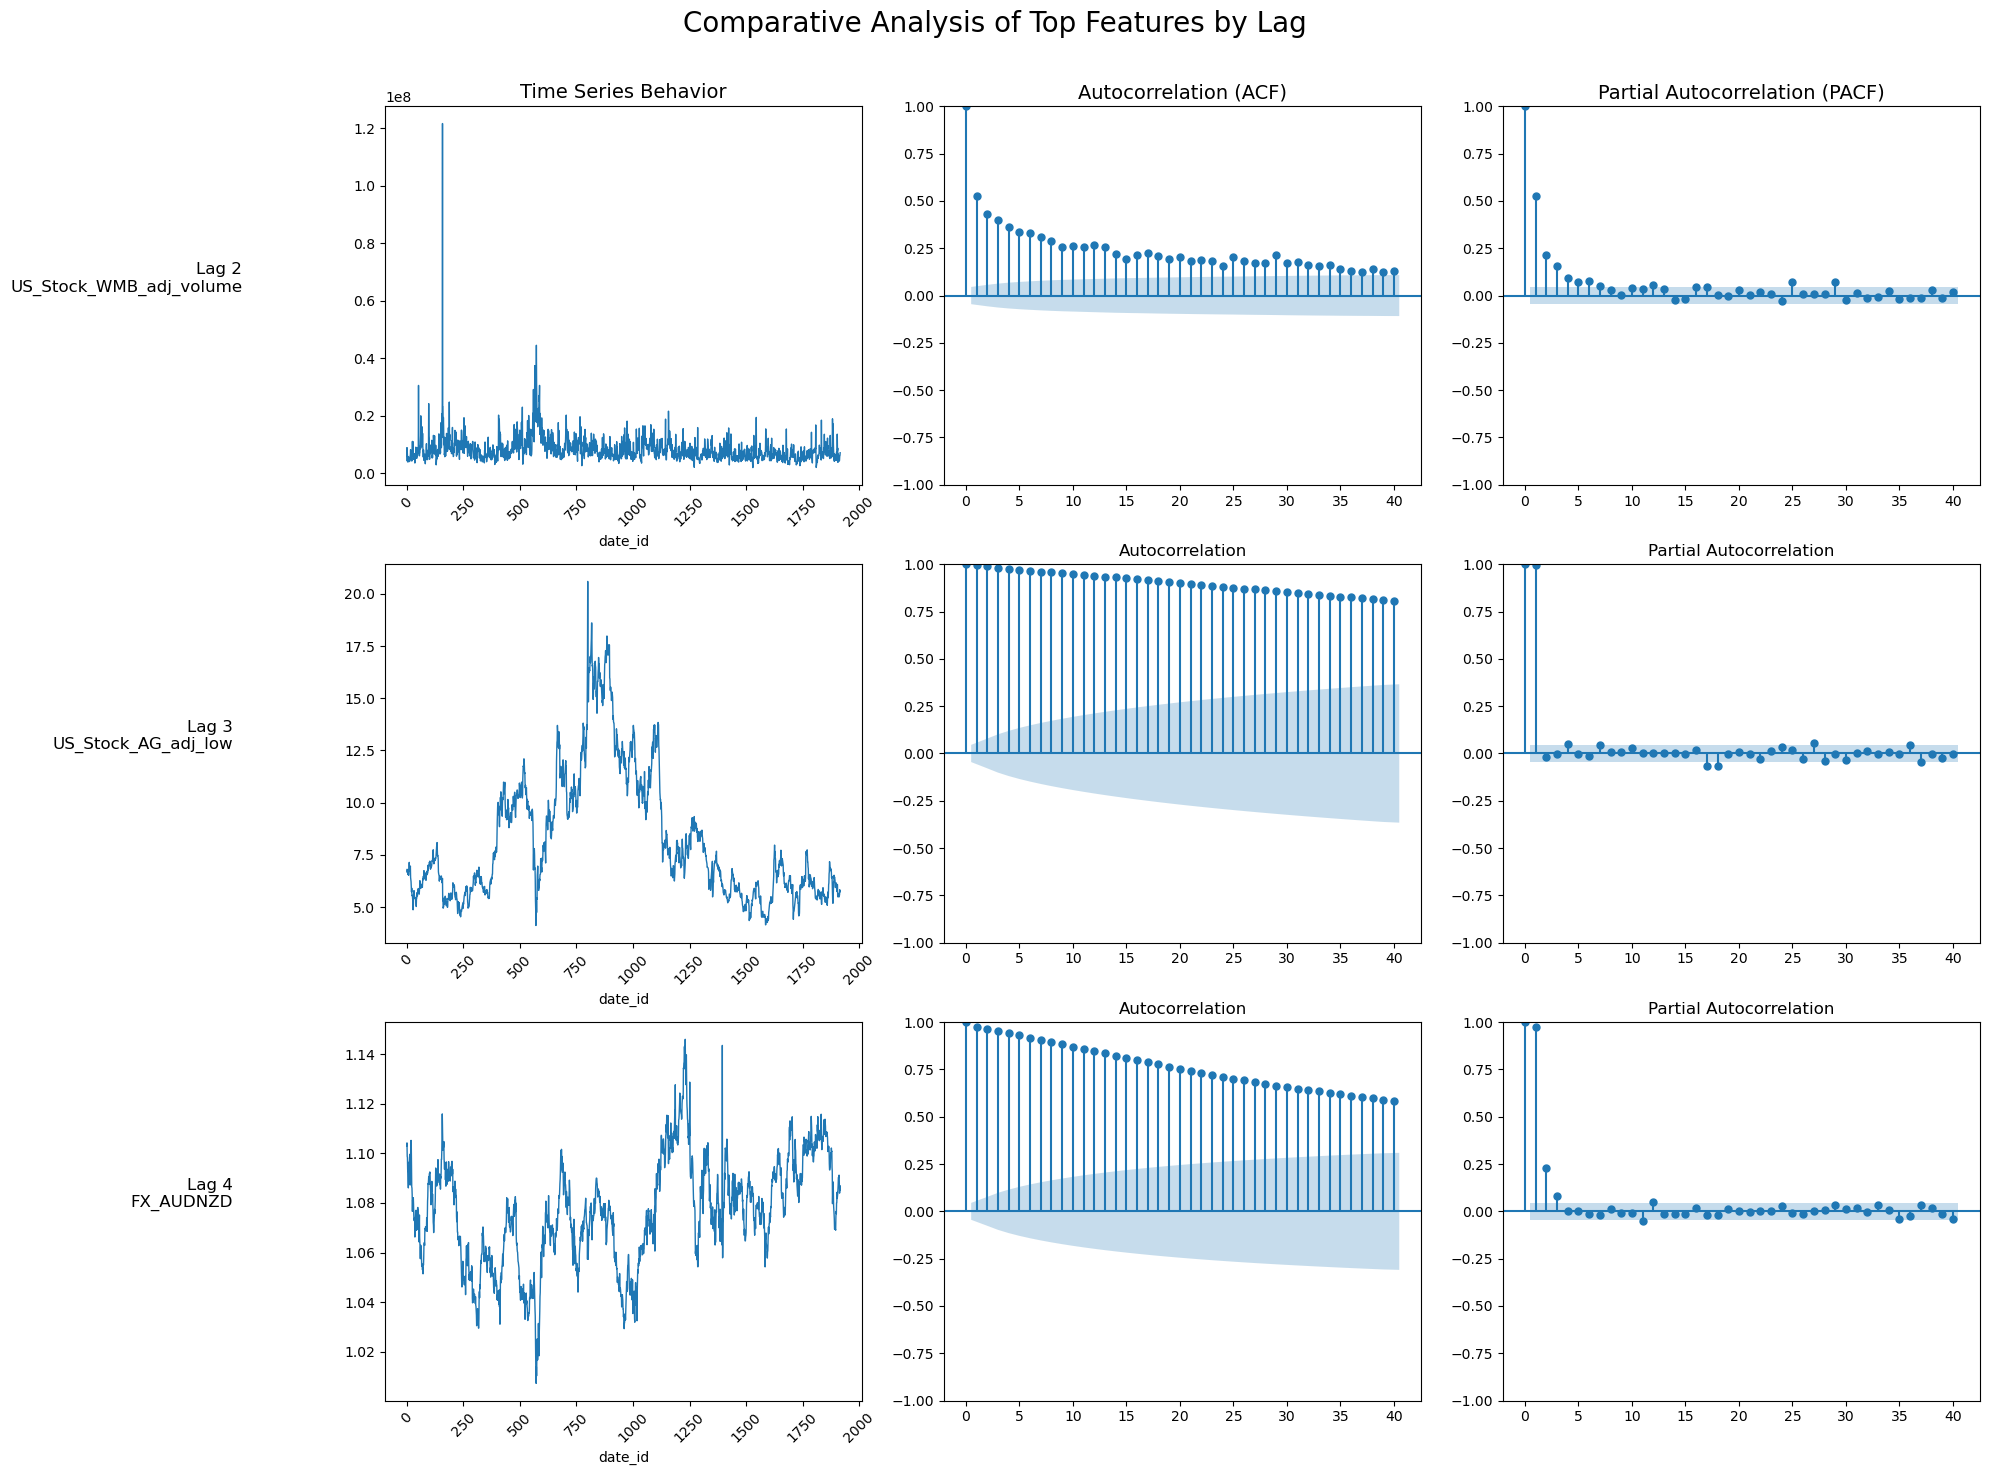

In [15]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import matplotlib.pyplot as plt
import seaborn as sns

top_features_by_lag = {
    2: 'US_Stock_WMB_adj_volume',
    3: 'US_Stock_AG_adj_low',
    4: 'FX_AUDNZD'
}

fig, axes = plt.subplots(3, 3, figsize=(20, 15))
plt.suptitle('Comparative Analysis of Top Features by Lag', fontsize=20)

for i, (lag, feature_name) in enumerate(top_features_by_lag.items()):
    if feature_name in train.columns:
        # Plot the time series from the original 'train' dataframe for a clean plot vs date
        sns.lineplot(data=train, x='date_id', y=feature_name, ax=axes[i, 0], lw=1)
        axes[i, 0].set_ylabel(f"Lag {lag}\n{feature_name}", fontsize=12, rotation=0, labelpad=80, ha='right')
        axes[i, 0].tick_params(axis='x', rotation=45)

        # Use the clean series from 'train' for ACF/PACF as well
        series = train[feature_name].dropna()
        plot_acf(series, ax=axes[i, 1], lags=40)
        plot_pacf(series, ax=axes[i, 2], lags=40)
    else:
        print(f"Feature {feature_name} not found, skipping...")
        continue

    if i == 0:
        axes[i, 0].set_title("Time Series Behavior", fontsize=14)
        axes[i, 1].set_title("Autocorrelation (ACF)", fontsize=14)
        axes[i, 2].set_title("Partial Autocorrelation (PACF)", fontsize=14)

plt.tight_layout(rect=[0, 0, 1, 0.97])
plt.show()

Top 10 features for lag=1:
JPX_RSS3_Rubber_Futures_Volume    0.017716
US_Stock_MPC_adj_volume           0.016504
US_Stock_KMI_adj_volume           0.015020
US_Stock_NUE_adj_volume           0.014339
US_Stock_URA_adj_volume           0.012172
US_Stock_RIO_adj_volume           0.009540
US_Stock_VCSH_adj_volume          0.008676
US_Stock_VGLT_adj_volume          0.008263
US_Stock_TIP_adj_volume           0.008196
US_Stock_VT_adj_volume            0.008118
dtype: float64




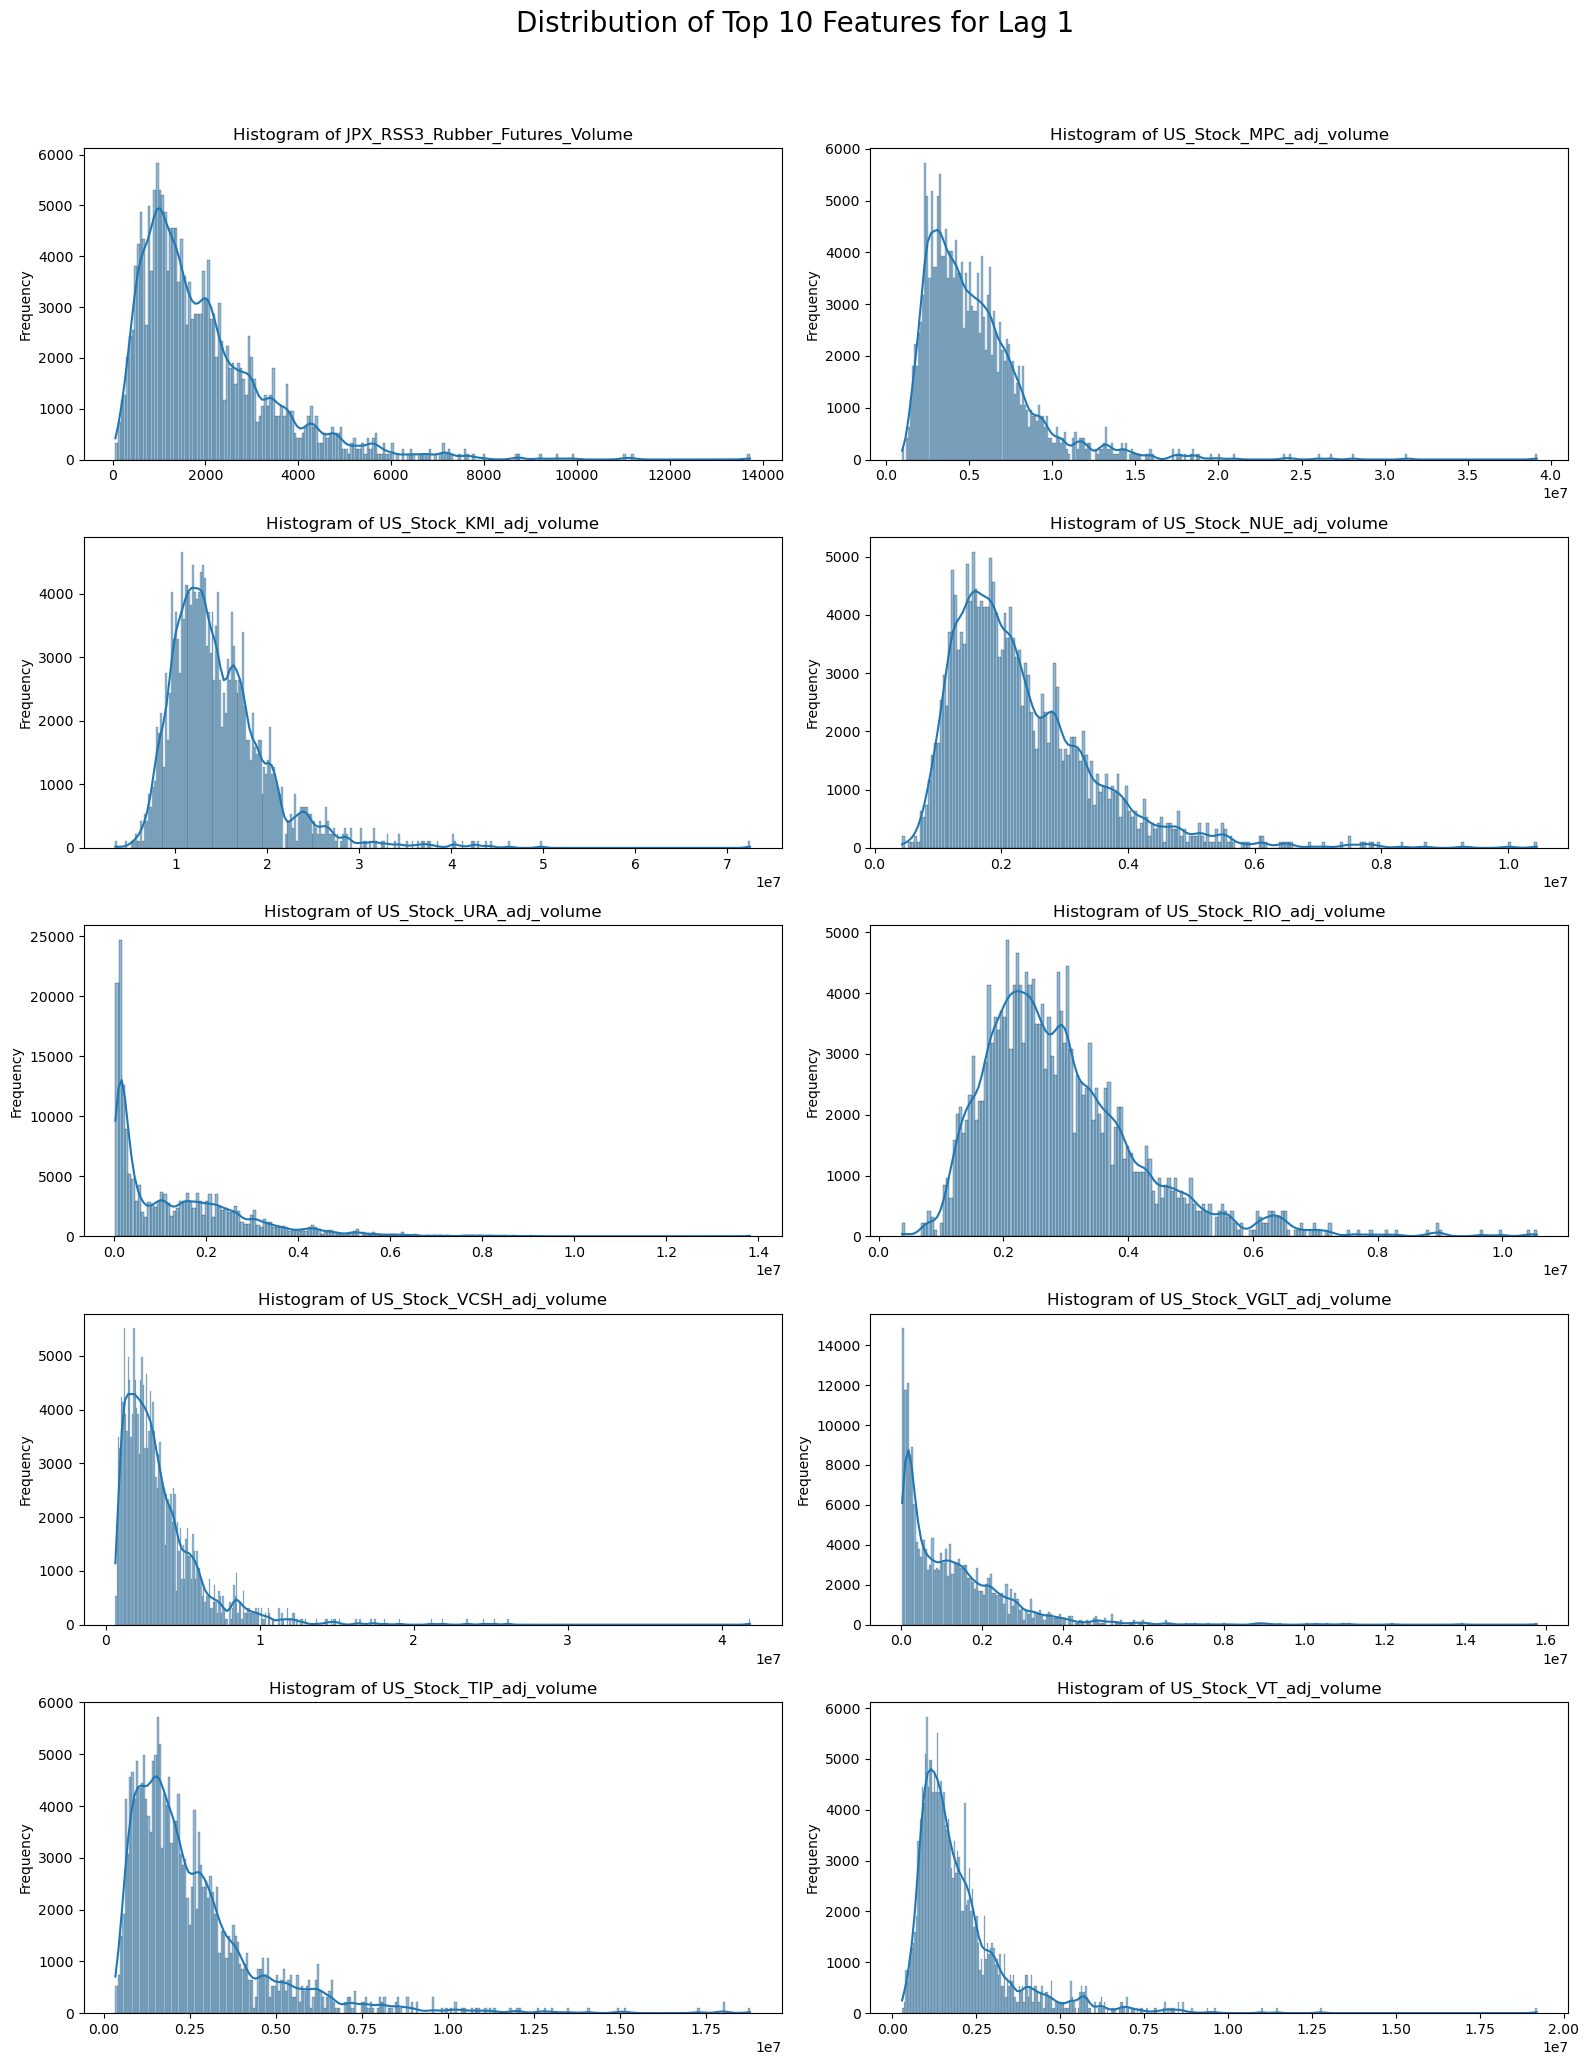

In [16]:
#  Get the top 10 features for Lag 1
# We re-run the experiment for lag 1 to get the feature list
# Note: The function will print the importances again.
importances_lag1 = feature_importance_experiment(target_long, 1)
top_10_features_lag1 = importances_lag1.head(10).index.tolist()

#  Filter the data for Lag 1 
lag1_data = target_long[target_long['lag'] == 1]

# Create and display the histograms 
# Set up a 5x2 grid for the 10 subplots
fig, axes = plt.subplots(nrows=5, ncols=2, figsize=(16, 20))
# Flatten the axes array for easy iteration
axes = axes.flatten()

fig.suptitle('Distribution of Top 10 Features for Lag 1', fontsize=20, y=1.03)

for i, feature in enumerate(top_10_features_lag1):
    ax = axes[i]
    # Plot histogram using seaborn for a cleaner look
    sns.histplot(data=lag1_data, x=feature, kde=True, ax=ax)
    ax.set_title(f'Histogram of {feature}', fontsize=12)
    ax.set_xlabel('')
    ax.set_ylabel('Frequency')

# Adjust layout to prevent titles/labels from overlapping
plt.tight_layout()
plt.show()

Top 10 features for lag=2:
US_Stock_WMB_adj_volume     0.013113
US_Stock_BNDX_adj_volume    0.010984
US_Stock_EMB_adj_volume     0.010672
US_Stock_VALE_adj_volume    0.010188
US_Stock_MPC_adj_volume     0.010017
US_Stock_VGIT_adj_volume    0.008807
US_Stock_FNV_adj_volume     0.008756
US_Stock_OXY_adj_volume     0.008667
US_Stock_DE_adj_volume      0.008652
US_Stock_TECK_adj_volume    0.008327
dtype: float64




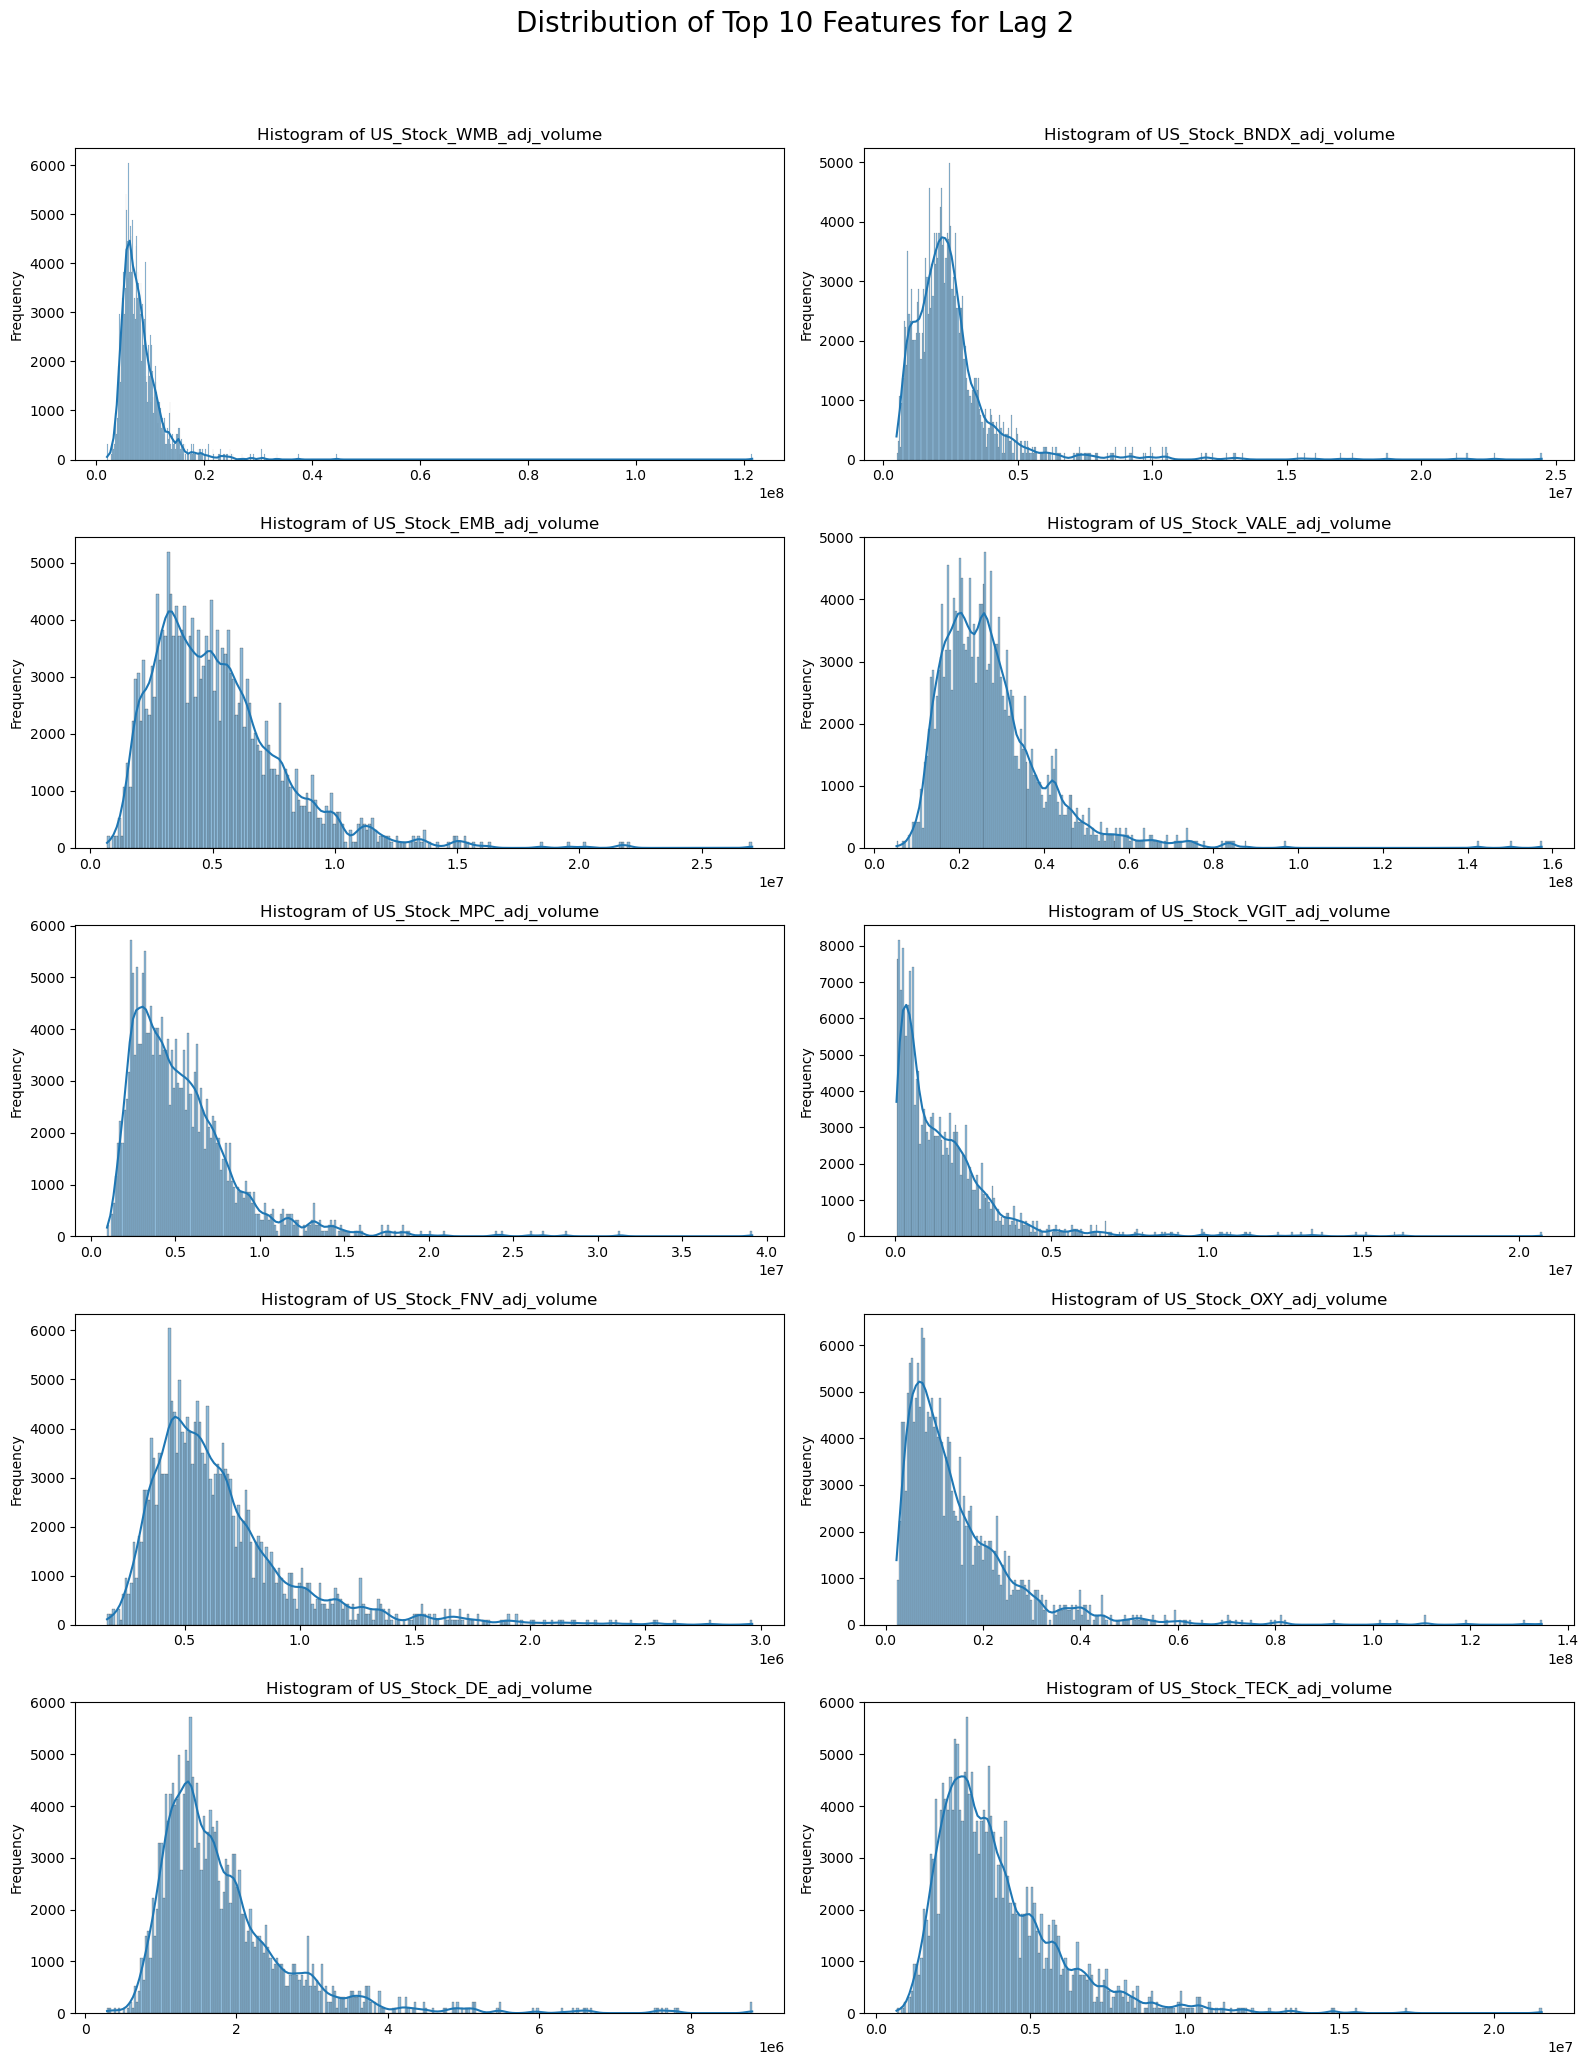

In [17]:
#  Get the top 10 features for Lag 2 
importances_lag2 = feature_importance_experiment(target_long, 2)
top_10_features_lag2 = importances_lag2.head(10).index.tolist()

#  Filter the data for Lag 2 
lag2_data = target_long[target_long['lag'] == 2]

#  Create and display the histograms 
fig, axes = plt.subplots(nrows=5, ncols=2, figsize=(16, 20))
axes = axes.flatten()
fig.suptitle('Distribution of Top 10 Features for Lag 2', fontsize=20, y=1.03)

for i, feature in enumerate(top_10_features_lag2):
    ax = axes[i]
    sns.histplot(data=lag2_data, x=feature, kde=True, ax=ax)
    ax.set_title(f'Histogram of {feature}', fontsize=12)
    ax.set_xlabel('')
    ax.set_ylabel('Frequency')

plt.tight_layout()
plt.show()

Top 10 features for lag=3:
US_Stock_AG_adj_low                            0.025161
LME_AH_Close                                   0.013866
JPX_Platinum_Standard_Futures_open_interest    0.013797
US_Stock_AMP_adj_volume                        0.013047
LME_PB_Close                                   0.012976
US_Stock_AG_adj_high                           0.012852
US_Stock_SPYV_adj_volume                       0.010873
US_Stock_OKE_adj_volume                        0.009055
JPX_Gold_Mini_Futures_open_interest            0.008750
FX_NOKGBP                                      0.007802
dtype: float64




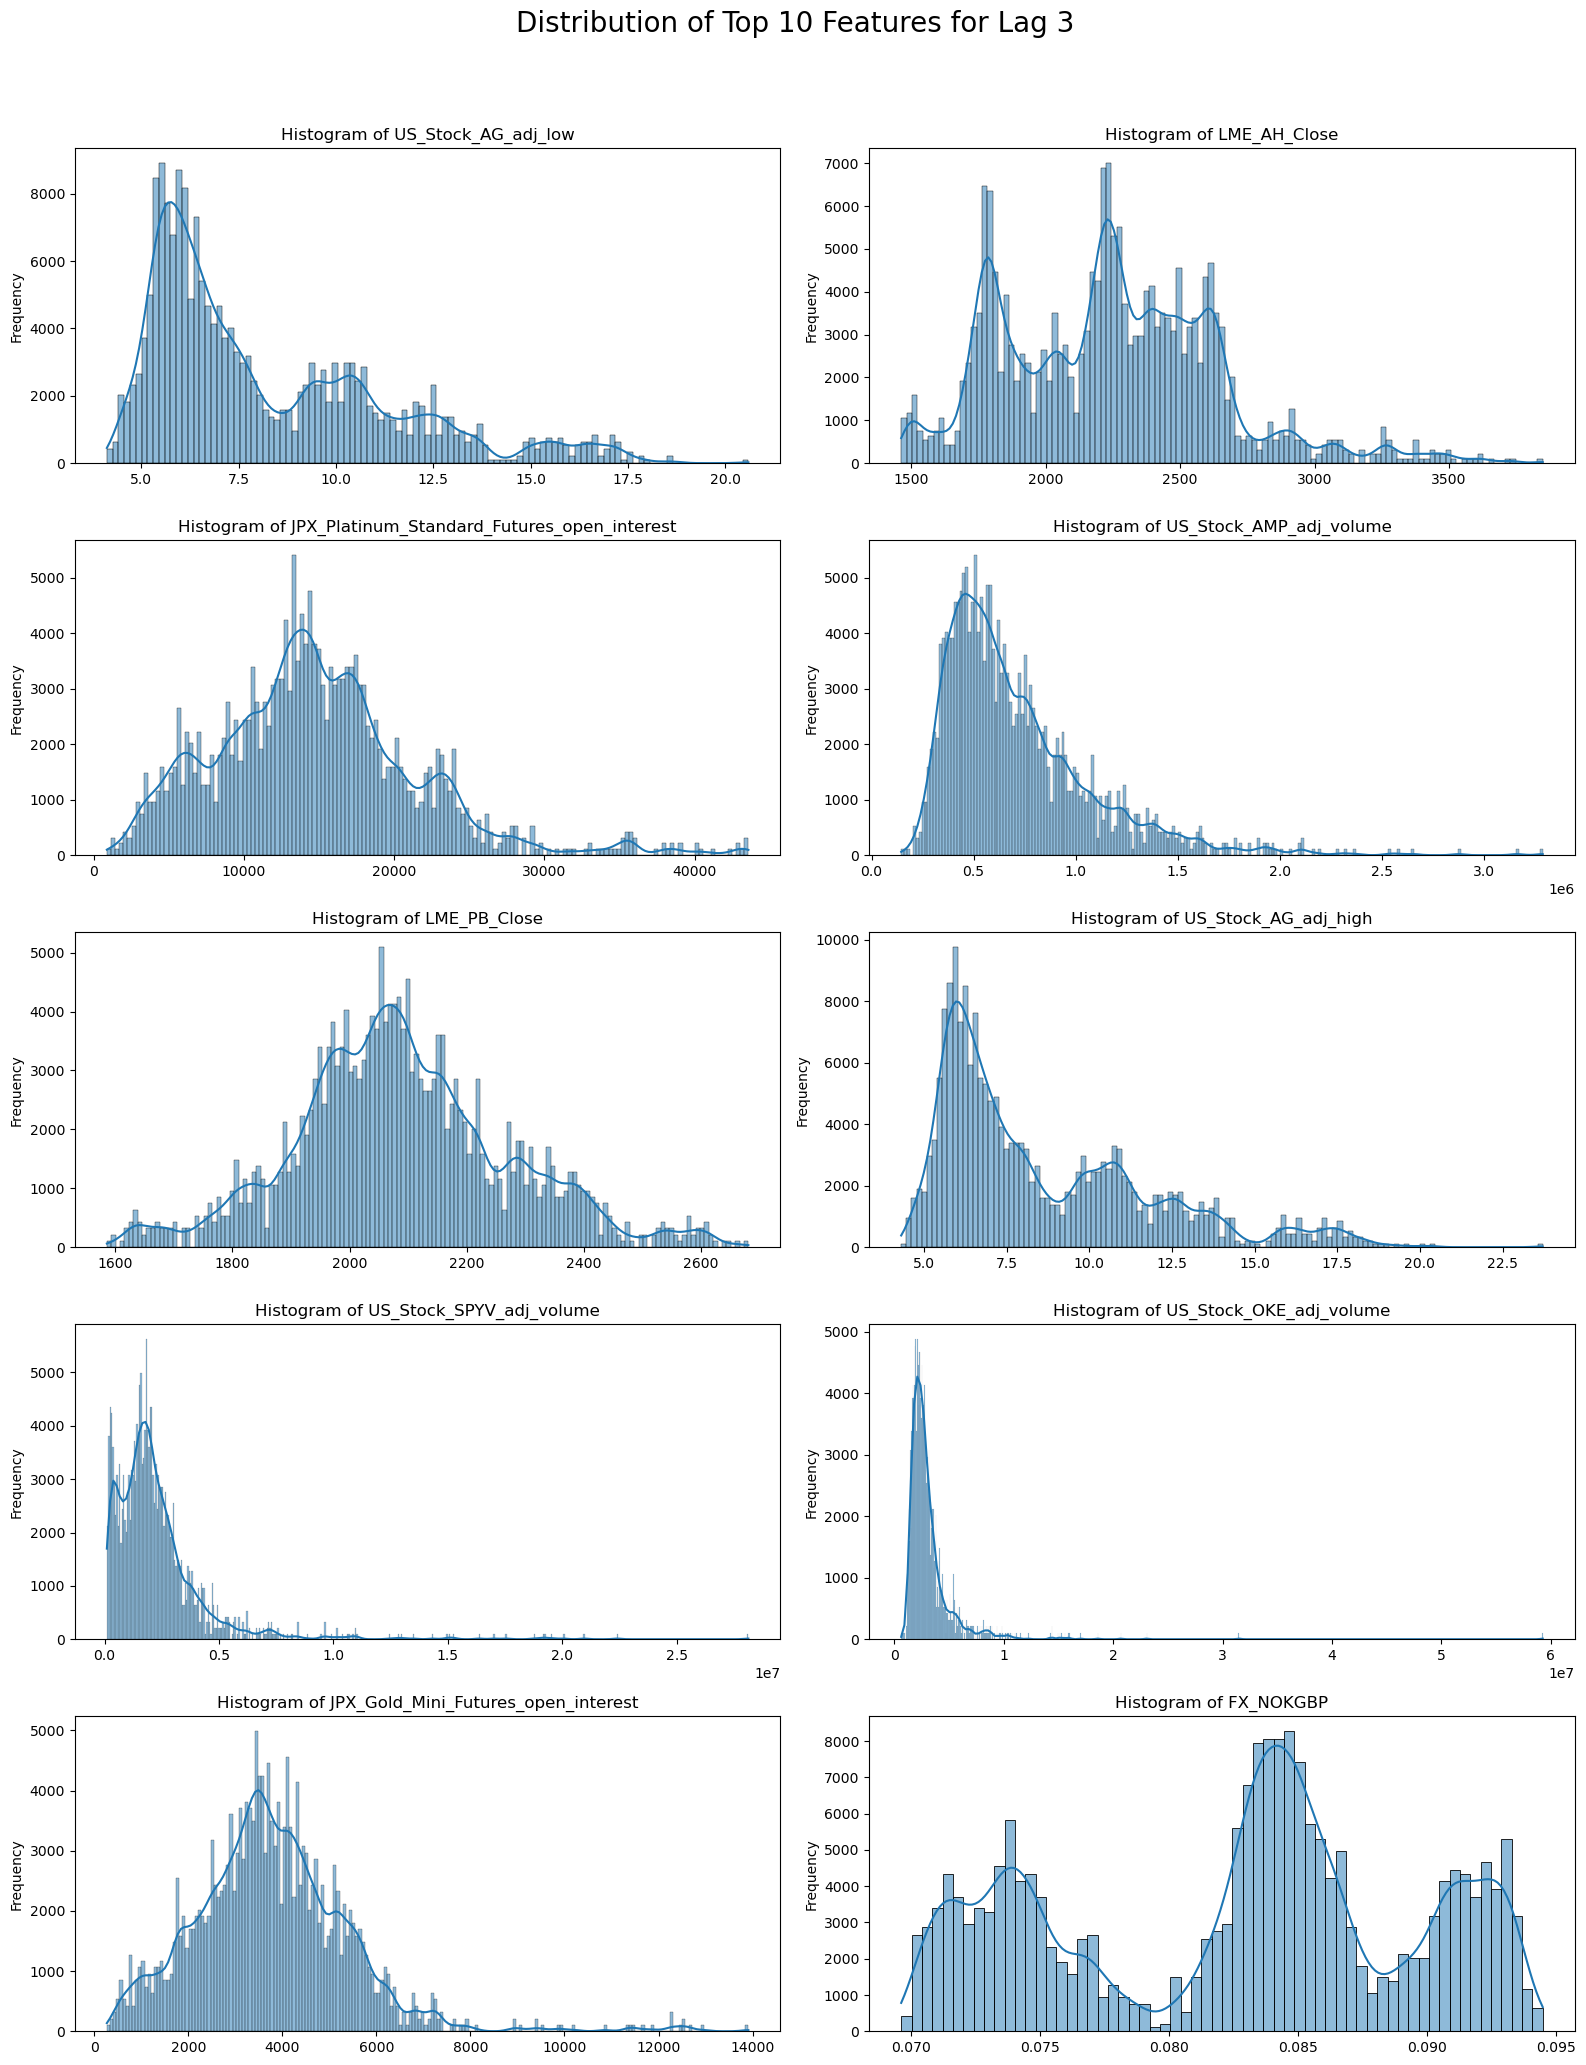

In [18]:
#  Get the top 10 features for Lag 3 
importances_lag3 = feature_importance_experiment(target_long, 3)
top_10_features_lag3 = importances_lag3.head(10).index.tolist()

#  Filter the data for Lag 3 
lag3_data = target_long[target_long['lag'] == 3]

#  Create and display the histograms 
fig, axes = plt.subplots(nrows=5, ncols=2, figsize=(16, 20))
axes = axes.flatten()
fig.suptitle('Distribution of Top 10 Features for Lag 3', fontsize=20, y=1.03)

for i, feature in enumerate(top_10_features_lag3):
    ax = axes[i]
    sns.histplot(data=lag3_data, x=feature, kde=True, ax=ax)
    ax.set_title(f'Histogram of {feature}', fontsize=12)
    ax.set_xlabel('')
    ax.set_ylabel('Frequency')

plt.tight_layout()
plt.show()

In [19]:
# --- Step 1: Get the top 10 features for Lag 4 ---
importances_lag4 = feature_importance_experiment(target_long, 4)
top_10_features_lag4 = importances_lag4.head(10).index.tolist()

# --- Step 2: Filter the data for Lag 4 ---
lag4_data = target_long[target_long['lag'] == 4]

# --- Step 3: Create and display the histograms ---
fig, axes = plt.subplots(nrows=5, ncols=2, figsize=(16, 20))
axes = axes.flatten()
fig.suptitle('Distribution of Top 10 Features for Lag 4', fontsize=20, y=1.03)

for i, feature in enumerate(top_10_features_lag4):
    ax = axes[i]
    sns.histplot(data=lag4_data, x=feature, kde=True, ax=ax)
    ax.set_title(f'Histogram of {feature}', fontsize=12)
    ax.set_xlabel('')
    ax.set_ylabel('Frequency')

Top 10 features for lag=4:
FX_AUDNZD                           0.021671
JPX_Gold_Standard_Futures_Volume    0.018479
FX_NOKGBP                           0.012756
US_Stock_NEM_adj_volume             0.010981
US_Stock_LYB_adj_open               0.010486
US_Stock_TD_adj_volume              0.009743
US_Stock_NUE_adj_volume             0.009000
US_Stock_KMI_adj_open               0.008824
US_Stock_VCSH_adj_volume            0.008761
US_Stock_EWJ_adj_volume             0.008258
dtype: float64




--- Statistical Insights for Lag 1 Features ---
                          Feature  Skewness   Kurtosis
0  JPX_RSS3_Rubber_Futures_Volume  1.879231   5.894678
1         US_Stock_MPC_adj_volume  2.568930  13.308805
2         US_Stock_KMI_adj_volume  2.182823  10.683881
3         US_Stock_NUE_adj_volume  1.810779   5.641034
4         US_Stock_URA_adj_volume  1.686610   4.706973
5         US_Stock_RIO_adj_volume  1.457804   3.690495
6        US_Stock_VCSH_adj_volume  3.680935  27.916577
7        US_Stock_VGLT_adj_volume  2.996593  15.998063
8         US_Stock_TIP_adj_volume  2.603519  10.683478
9          US_Stock_VT_adj_volume  2.785748  14.540195

--- Interpretation Guide ---
Skewness: Measures asymmetry. |>1| is highly skewed, |0.5-1| is moderately skewed.
Kurtosis: Measures 'tailedness' (outliers). >3 indicates heavy tails/outliers.


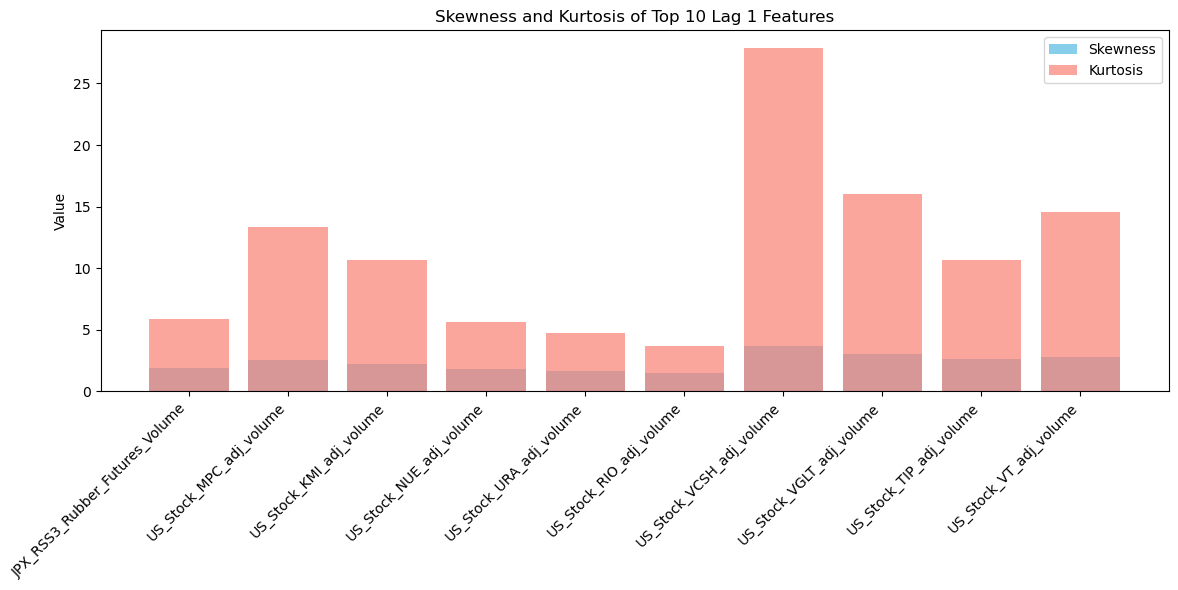

In [28]:
# --- Calculate Skewness and Kurtosis for Lag 1 Features ---
print("--- Statistical Insights for Lag 1 Features ---")

# Create a list to hold the results
stats_list = []

for feature in top_10_features_lag1:
    # Calculate skewness and kurtosis for the feature
    skewness = lag1_data[feature].skew()
    kurtosis = lag1_data[feature].kurt()
    stats_list.append({
        "Feature": feature,
        "Skewness": skewness,
        "Kurtosis": kurtosis
    })

# Create a DataFrame from the results for easy viewing
stats_df = pd.DataFrame(stats_list)
print(stats_df)

print("\n--- Interpretation Guide ---")
print("Skewness: Measures asymmetry. |>1| is highly skewed, |0.5-1| is moderately skewed.")
print("Kurtosis: Measures 'tailedness' (outliers). >3 indicates heavy tails/outliers.")

# --- Plot Skewness and Kurtosis for Lag 4 Features ---
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.bar(stats_df['Feature'], stats_df['Skewness'], color='skyblue', label='Skewness')
plt.bar(stats_df['Feature'], stats_df['Kurtosis'], color='salmon', alpha=0.7, label='Kurtosis')
plt.xticks(rotation=45, ha='right')
plt.ylabel('Value')
plt.title('Skewness and Kurtosis of Top 10 Lag 1 Features')
plt.legend()
plt.tight_layout()
plt.show()


--- Statistical Insights for Lag 2 Features ---


                    Feature  Skewness    Kurtosis
0   US_Stock_WMB_adj_volume  9.124426  190.694177
1  US_Stock_BNDX_adj_volume  4.708164   34.129066
2   US_Stock_EMB_adj_volume  1.682986    5.836203
3  US_Stock_VALE_adj_volume  2.521659   14.369656
4   US_Stock_MPC_adj_volume  2.568930   13.308805
5  US_Stock_VGIT_adj_volume  3.693402   21.420896
6   US_Stock_FNV_adj_volume  2.163784    6.904017
7   US_Stock_OXY_adj_volume  3.181700   16.615169
8    US_Stock_DE_adj_volume  2.644099   11.558266
9  US_Stock_TECK_adj_volume  1.948987    6.921067

--- Interpretation Guide ---
Skewness: Measures asymmetry. |>1| is highly skewed, |0.5-1| is moderately skewed.
Kurtosis: Measures 'tailedness' (outliers). >3 indicates heavy tails/outliers.


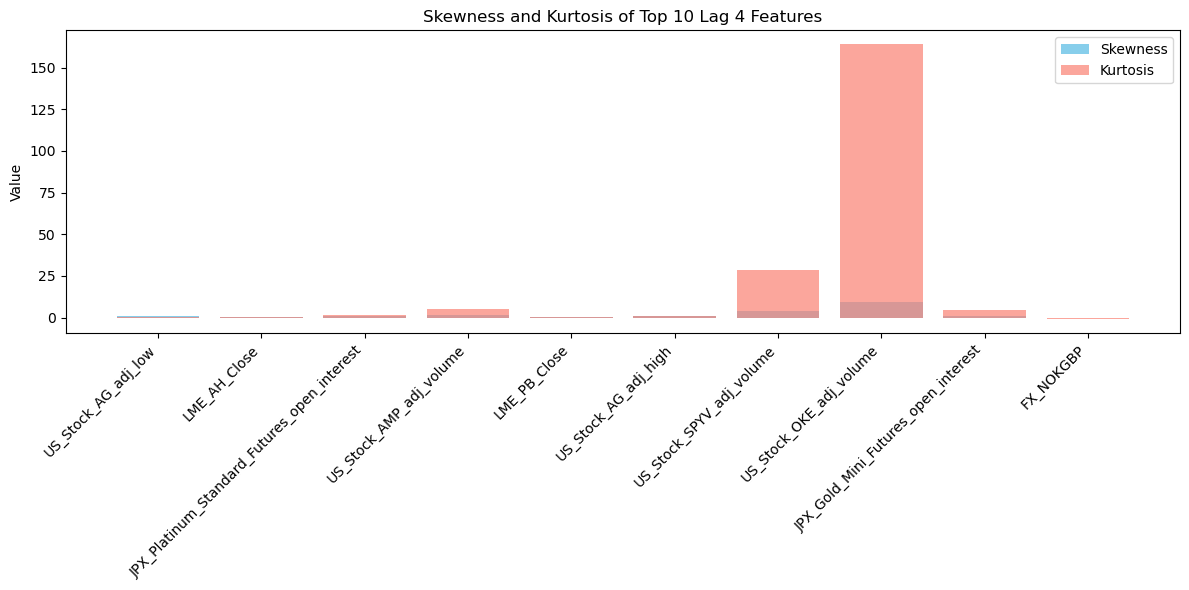

In [ ]:
# --- Calculate Skewness and Kurtosis for Lag 2 Features ---
print("--- Statistical Insights for Lag 2 Features ---")

stats_list_2 = []
for feature in top_10_features_lag2:
    skewness = lag2_data[feature].skew()
    kurtosis = lag2_data[feature].kurt()
    stats_list_2.append({
        "Feature": feature,
        "Skewness": skewness,
        "Kurtosis": kurtosis
    })

stats_df_2 = pd.DataFrame(stats_list_2)
print(stats_df_2)

print("\n--- Interpretation Guide ---")
print("Skewness: Measures asymmetry. |>1| is highly skewed, |0.5-1| is moderately skewed.")
print("Kurtosis: Measures 'tailedness' (outliers). >3 indicates heavy tails/outliers.")

# --- Plot Skewness and Kurtosis for Lag 4 Features ---
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.bar(stats_df_3['Feature'], stats_df_3['Skewness'], color='skyblue', label='Skewness')
plt.bar(stats_df_3['Feature'], stats_df_3['Kurtosis'], color='salmon', alpha=0.7, label='Kurtosis')
plt.xticks(rotation=45, ha='right')
plt.ylabel('Value')
plt.title('Skewness and Kurtosis of Top 10 Lag 2 Features')
plt.legend()
plt.tight_layout()
plt.show()

--- Statistical Insights for Lag 3 Features ---
                                       Feature  Skewness    Kurtosis
0                          US_Stock_AG_adj_low  1.116895    0.572369
1                                 LME_AH_Close  0.554216    0.555870
2  JPX_Platinum_Standard_Futures_open_interest  0.860447    1.744952
3                      US_Stock_AMP_adj_volume  1.786146    5.091261
4                                 LME_PB_Close  0.251844    0.344791
5                         US_Stock_AG_adj_high  1.146605    0.746190
6                     US_Stock_SPYV_adj_volume  4.246329   28.719989
7                      US_Stock_OKE_adj_volume  9.125975  164.075341
8          JPX_Gold_Mini_Futures_open_interest  1.211767    4.655613
9                                    FX_NOKGBP -0.226428   -1.103764

--- Interpretation Guide ---
Skewness: Measures asymmetry. |>1| is highly skewed, |0.5-1| is moderately skewed.
Kurtosis: Measures 'tailedness' (outliers). >3 indicates heavy tails/outliers.


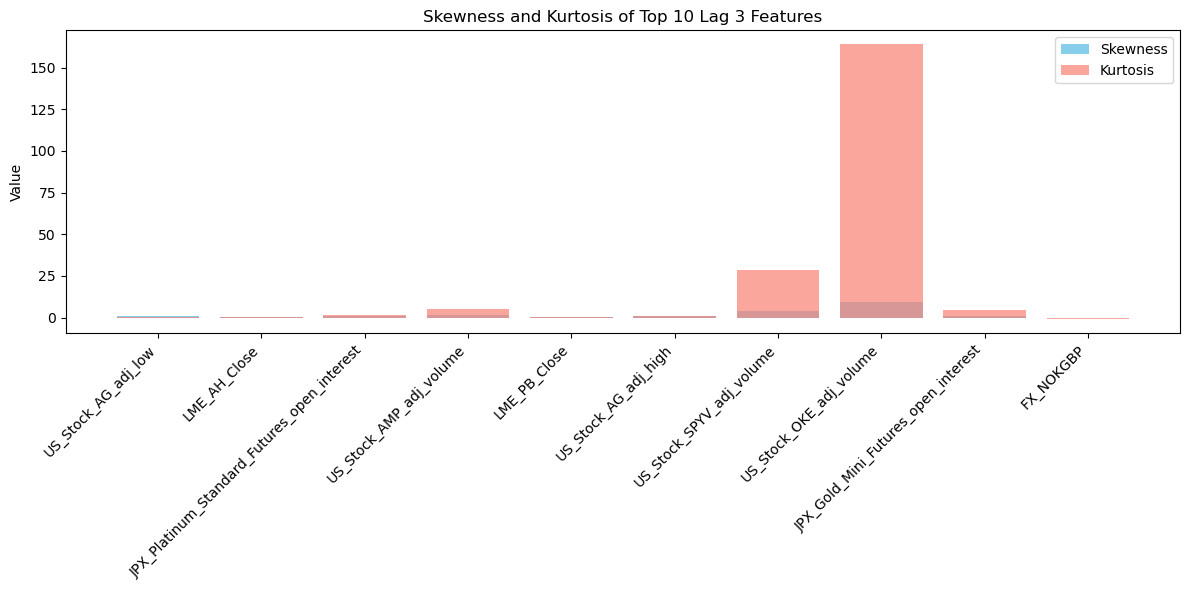

In [26]:
# --- Calculate Skewness and Kurtosis for Lag 3 Features ---
print("--- Statistical Insights for Lag 3 Features ---")

stats_list_3 = []
for feature in top_10_features_lag3:
    skewness = lag3_data[feature].skew()
    kurtosis = lag3_data[feature].kurt()
    stats_list_3.append({
        "Feature": feature,
        "Skewness": skewness,
        "Kurtosis": kurtosis
    })

stats_df_3 = pd.DataFrame(stats_list_3)
print(stats_df_3)

print("\n--- Interpretation Guide ---")
print("Skewness: Measures asymmetry. |>1| is highly skewed, |0.5-1| is moderately skewed.")
print("Kurtosis: Measures 'tailedness' (outliers). >3 indicates heavy tails/outliers.")

# --- Plot Skewness and Kurtosis for Lag 4 Features ---
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.bar(stats_df_3['Feature'], stats_df_3['Skewness'], color='skyblue', label='Skewness')
plt.bar(stats_df_3['Feature'], stats_df_3['Kurtosis'], color='salmon', alpha=0.7, label='Kurtosis')
plt.xticks(rotation=45, ha='right')
plt.ylabel('Value')
plt.title('Skewness and Kurtosis of Top 10 Lag 3 Features')
plt.legend()
plt.tight_layout()
plt.show()

--- Statistical Insights for Lag 4 Features ---
                            Feature  Skewness   Kurtosis
0                         FX_AUDNZD -0.070658  -0.177972
1  JPX_Gold_Standard_Futures_Volume  2.778384  12.374375
2                         FX_NOKGBP -0.226428  -1.103764
3           US_Stock_NEM_adj_volume  6.030754  72.767698
4             US_Stock_LYB_adj_open -0.274694  -0.578320
5            US_Stock_TD_adj_volume  2.500524  10.033012
6           US_Stock_NUE_adj_volume  1.810779   5.641034
7             US_Stock_KMI_adj_open  1.561974   2.333022
8          US_Stock_VCSH_adj_volume  3.680935  27.916577
9           US_Stock_EWJ_adj_volume  2.338289   9.072951

--- Interpretation Guide ---
Skewness: Measures asymmetry. |>1| is highly skewed, |0.5-1| is moderately skewed.
Kurtosis: Measures 'tailedness' (outliers). >3 indicates heavy tails/outliers.


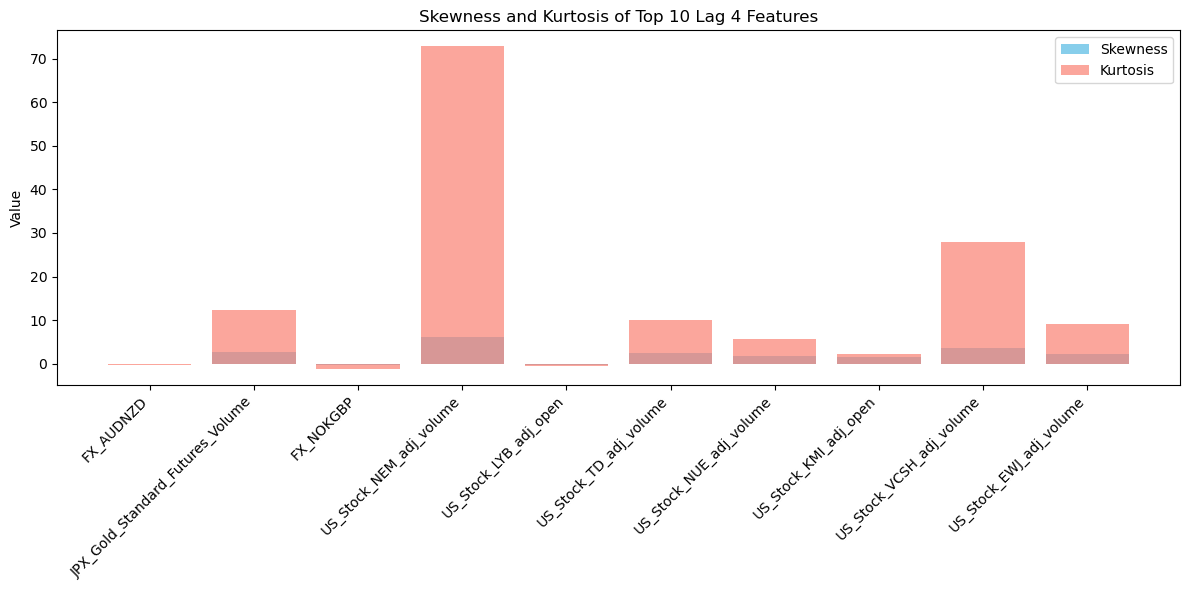

In [25]:
# --- Calculate Skewness and Kurtosis for Lag 4 Features ---
print("--- Statistical Insights for Lag 4 Features ---")

stats_list_4 = []
for feature in top_10_features_lag4:
    skewness = lag4_data[feature].skew()
    kurtosis = lag4_data[feature].kurt()
    stats_list_4.append({
        "Feature": feature,
        "Skewness": skewness,
        "Kurtosis": kurtosis
    })

stats_df_4 = pd.DataFrame(stats_list_4)
print(stats_df_4)

print("\n--- Interpretation Guide ---")
print("Skewness: Measures asymmetry. |>1| is highly skewed, |0.5-1| is moderately skewed.")
print("Kurtosis: Measures 'tailedness' (outliers). >3 indicates heavy tails/outliers.")


# --- Plot Skewness and Kurtosis for Lag 4 Features ---
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.bar(stats_df_4['Feature'], stats_df_4['Skewness'], color='skyblue', label='Skewness')
plt.bar(stats_df_4['Feature'], stats_df_4['Kurtosis'], color='salmon', alpha=0.7, label='Kurtosis')
plt.xticks(rotation=45, ha='right')
plt.ylabel('Value')
plt.title('Skewness and Kurtosis of Top 10 Lag 4 Features')
plt.legend()
plt.tight_layout()
plt.show()